## Digital marketing

### importing libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/digital_marketing_campaign_dataset.csv')
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [3]:
df.drop('CustomerID',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  8000 non-null   int64  
 1   Gender               8000 non-null   object 
 2   Income               8000 non-null   int64  
 3   CampaignChannel      8000 non-null   object 
 4   CampaignType         8000 non-null   object 
 5   AdSpend              8000 non-null   float64
 6   ClickThroughRate     8000 non-null   float64
 7   ConversionRate       8000 non-null   float64
 8   WebsiteVisits        8000 non-null   int64  
 9   PagesPerVisit        8000 non-null   float64
 10  TimeOnSite           8000 non-null   float64
 11  SocialShares         8000 non-null   int64  
 12  EmailOpens           8000 non-null   int64  
 13  EmailClicks          8000 non-null   int64  
 14  PreviousPurchases    8000 non-null   int64  
 15  LoyaltyPoints        8000 non-null   i

In [4]:
df.duplicated().sum()

0

### Demographic Information
#### CustomerID: Unique identifier for each customer.
#### Age: Age of the customer.
#### Gender: Gender of the customer (Male/Female).
#### Income: Annual income of the customer in USD.
### Marketing-specific Variables
#### CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
#### CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
#### AdSpend: Amount spent on the marketing campaign in USD.
#### ClickThroughRate: Rate at which customers click on the marketing content.
#### ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
#### AdvertisingPlatform: Confidential.
#### AdvertisingTool: Confidential.
### Customer Engagement Variables
#### WebsiteVisits: Number of visits to the website.
#### PagesPerVisit: Average number of pages visited per session.
#### TimeOnSite: Average time spent on the website per visit (in minutes).
#### SocialShares: Number of times the marketing content was shared on social media.
#### EmailOpens: Number of times marketing emails were opened.
#### EmailClicks: Number of times links in marketing emails were clicked.
### Historical Data
#### PreviousPurchases: Number of previous purchases made by the customer.
#### LoyaltyPoints: Number of loyalty points accumulated by the customer.
### Target Variable
#### Conversion: Binary variable indicating whether the customer converted (1) or not (0).

### EDA - Cat columns

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'gender', 'income', 'campaignchannel', 'campaigntype', 'adspend',
       'clickthroughrate', 'conversionrate', 'websitevisits', 'pagespervisit',
       'timeonsite', 'socialshares', 'emailopens', 'emailclicks',
       'previouspurchases', 'loyaltypoints', 'advertisingplatform',
       'advertisingtool', 'conversion'],
      dtype='object')

In [6]:
df.gender.value_counts()

gender
Female    4839
Male      3161
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

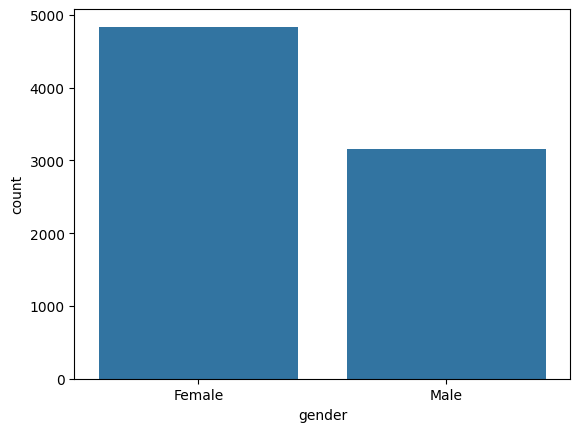

In [7]:
sns.countplot(x=df.gender)

In [8]:
df.campaignchannel.value_counts()

campaignchannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

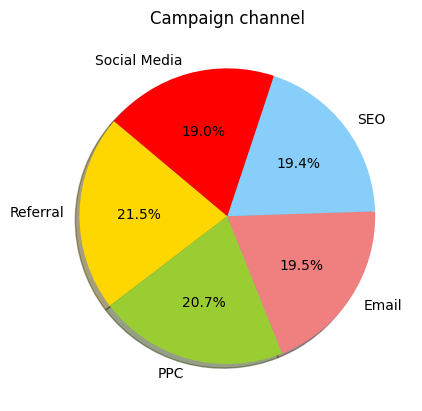

In [9]:
values = df.campaignchannel.value_counts()
labels = ['Referral','PPC','Email','SEO','Social Media']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']

plt.title('Campaign channel')
plt.pie(values, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.show()

In [10]:
df.campaigntype.value_counts()

campaigntype
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

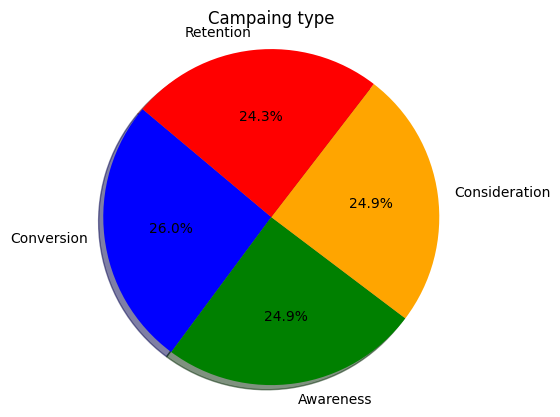

In [11]:
values = df.campaigntype.value_counts()
labels = ['Conversion','Awareness','Consideration','Retention']
colors = ['blue', 'green', 'orange','red']

plt.title('Campaing type')
plt.pie(values, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
df.columns

Index(['age', 'gender', 'income', 'campaignchannel', 'campaigntype', 'adspend',
       'clickthroughrate', 'conversionrate', 'websitevisits', 'pagespervisit',
       'timeonsite', 'socialshares', 'emailopens', 'emailclicks',
       'previouspurchases', 'loyaltypoints', 'advertisingplatform',
       'advertisingtool', 'conversion'],
      dtype='object')

In [13]:
df.advertisingplatform.value_counts()

advertisingplatform
IsConfid    8000
Name: count, dtype: int64

In [14]:
df.advertisingtool.value_counts()

advertisingtool
ToolConfid    8000
Name: count, dtype: int64

In [15]:
df.drop(['advertisingtool','advertisingplatform'],axis=1,inplace=True)

### Numerical columns

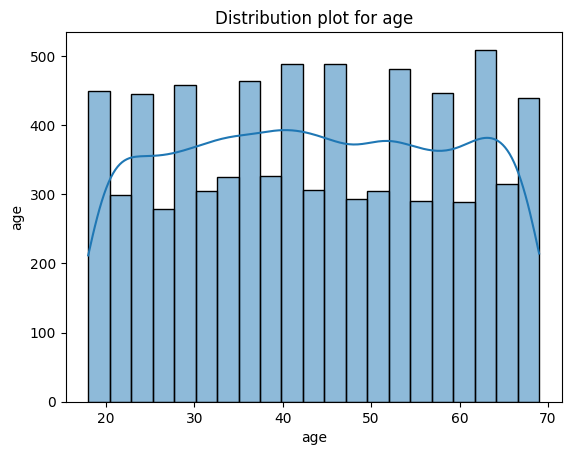

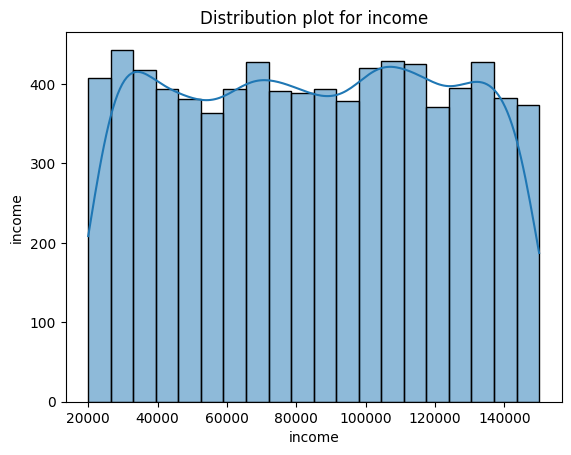

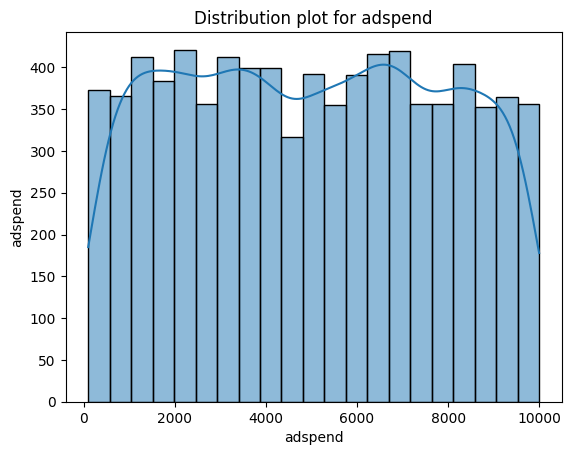

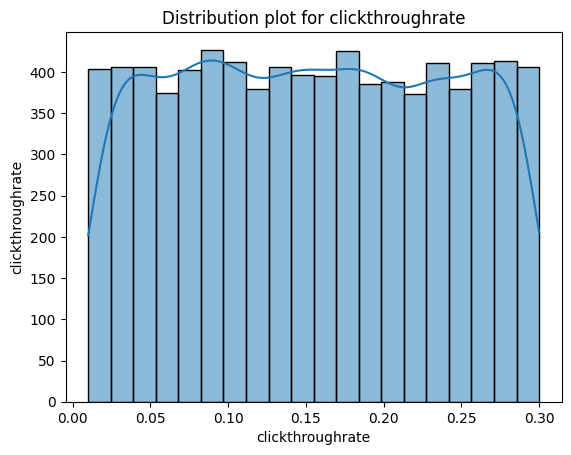

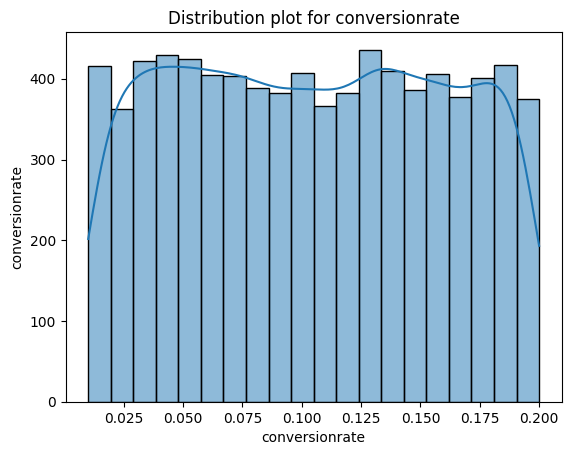

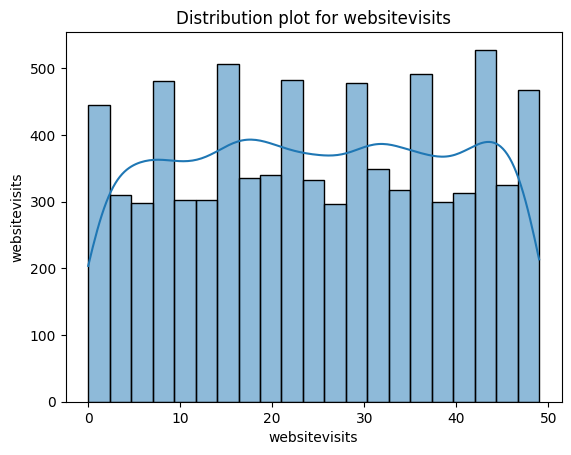

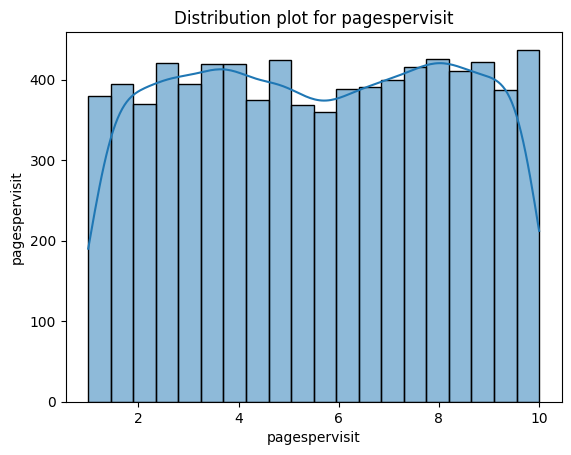

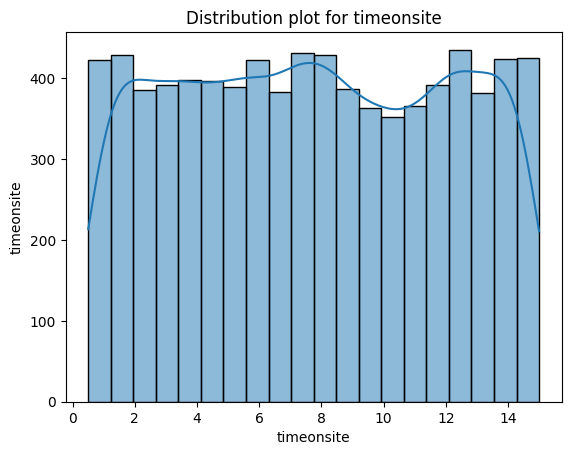

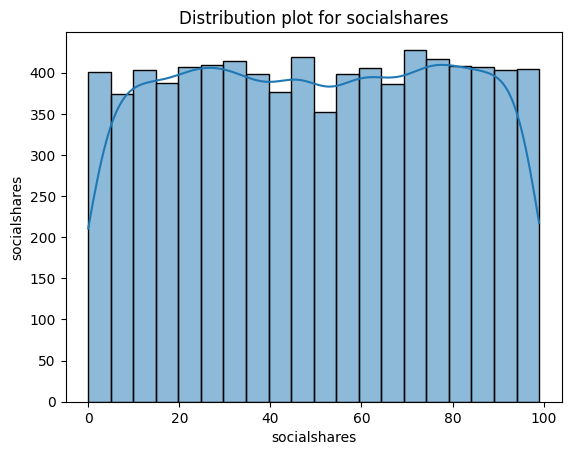

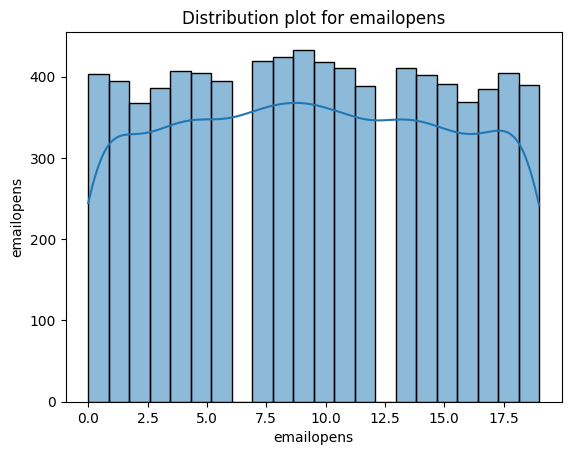

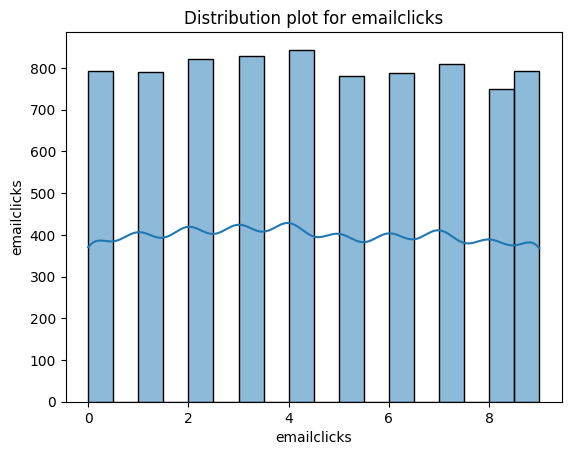

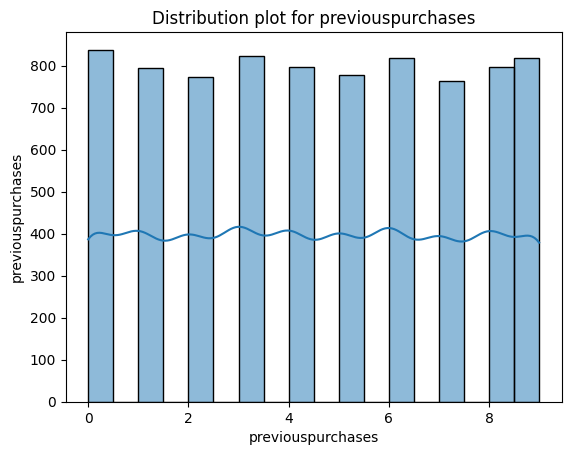

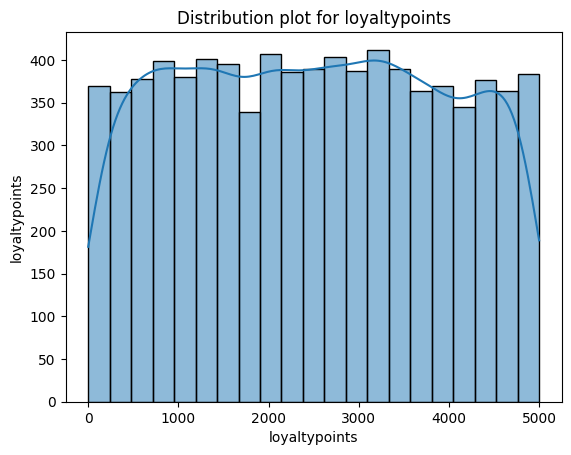

In [16]:
num_cols = ['age', 'income','adspend','clickthroughrate', 'conversionrate', 'websitevisits', 'pagespervisit','timeonsite', 'socialshares', 'emailopens', 'emailclicks','previouspurchases', 'loyaltypoints']
for i in num_cols:
    sns.histplot(df[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

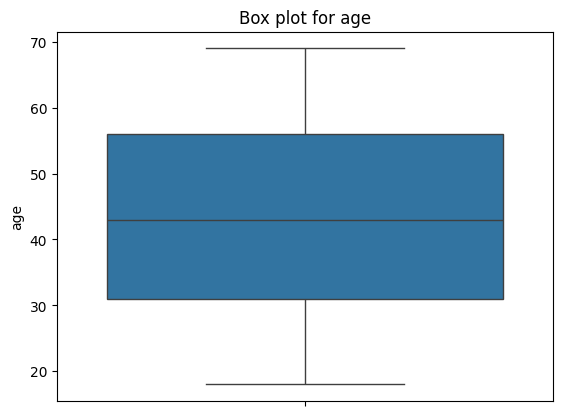

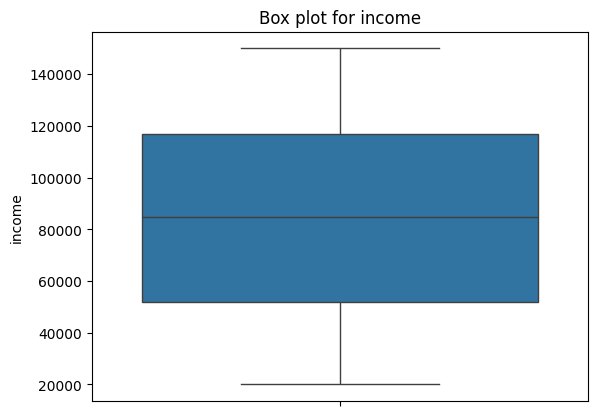

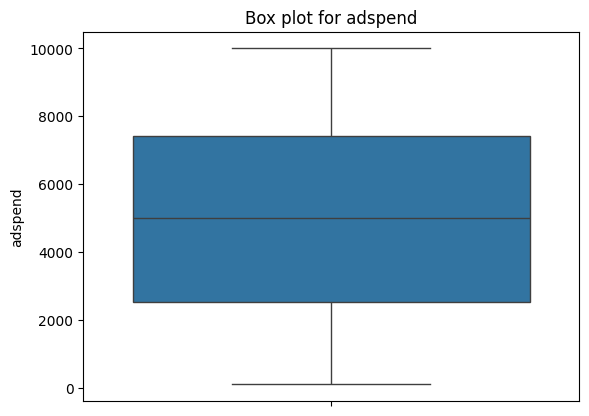

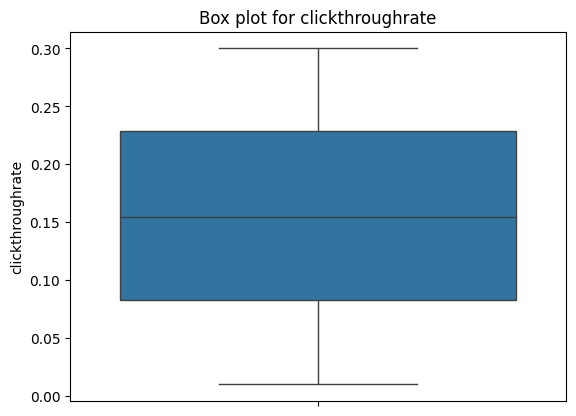

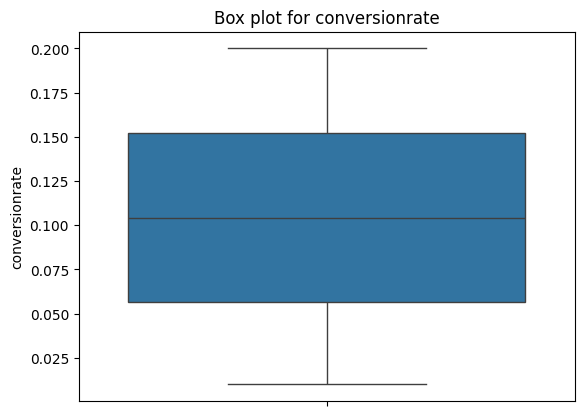

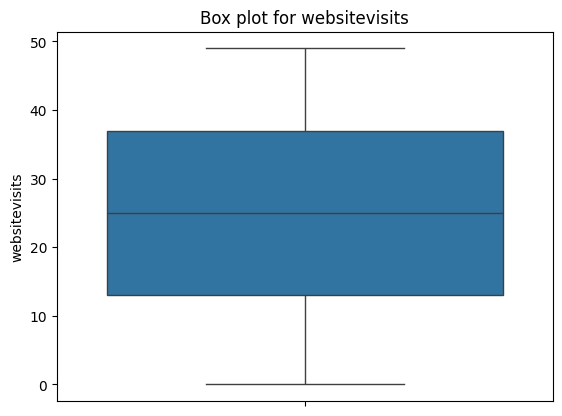

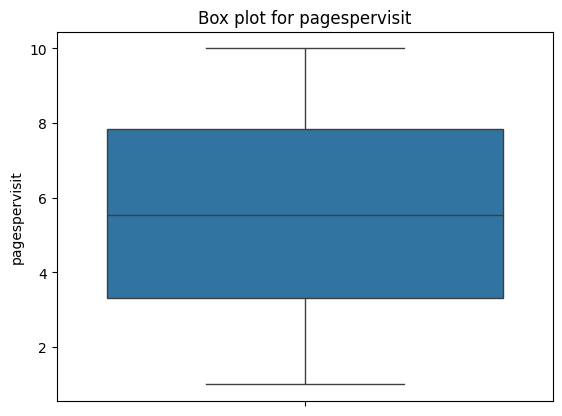

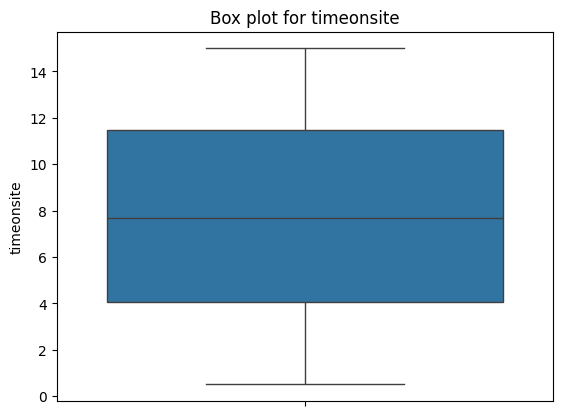

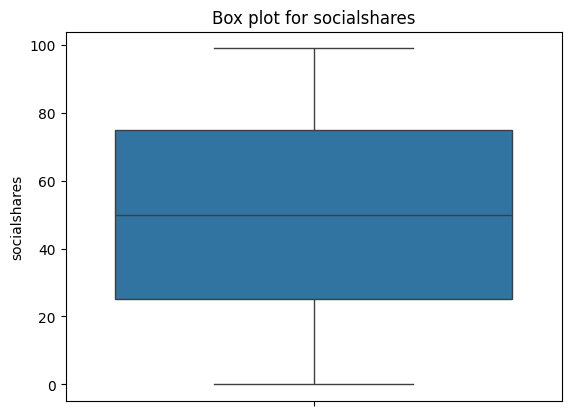

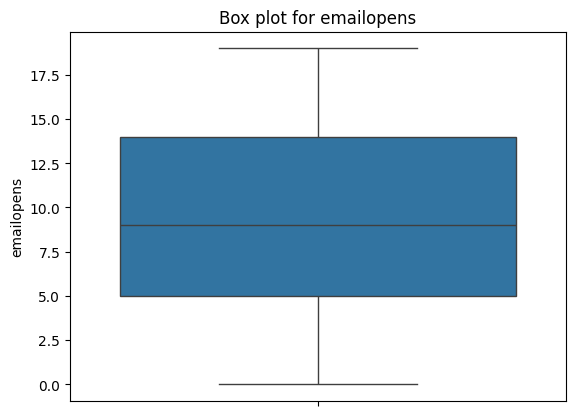

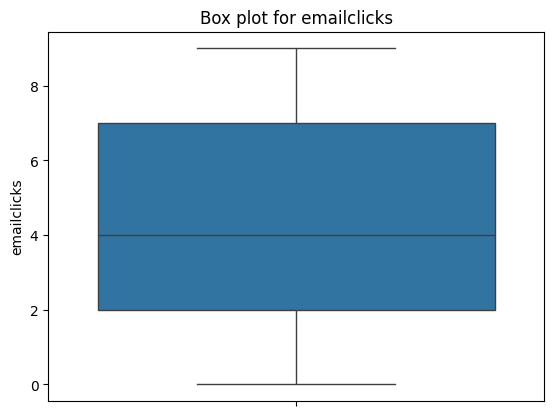

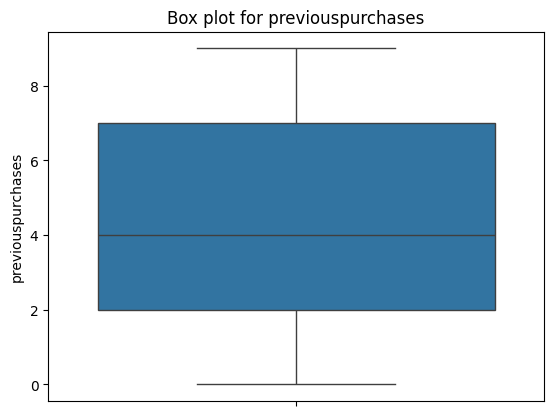

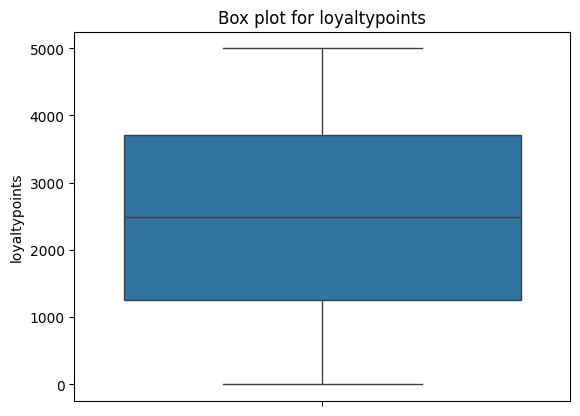

In [17]:
num_cols = ['age', 'income','adspend','clickthroughrate', 'conversionrate', 'websitevisits', 'pagespervisit','timeonsite', 'socialshares', 'emailopens', 'emailclicks','previouspurchases', 'loyaltypoints']
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

In [18]:
df.describe()

,age,income,adspend,clickthroughrate,conversionrate,websitevisits,pagespervisit,timeonsite,socialshares,emailopens,emailclicks,previouspurchases,loyaltypoints,conversion
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [19]:
df.conversion.value_counts()

conversion
1    7012
0     988
Name: count, dtype: int64

<Axes: xlabel='conversion', ylabel='count'>

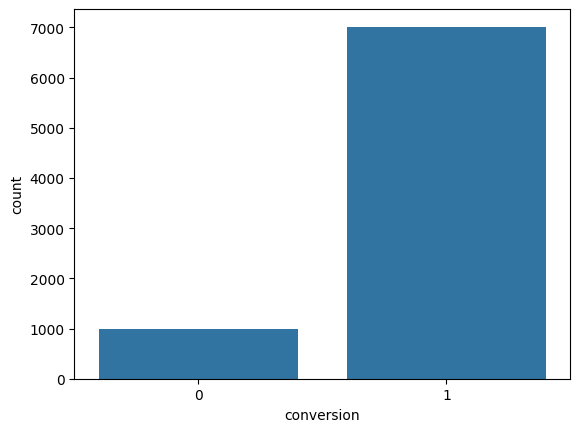

In [20]:
sns.countplot(x=df.conversion)

In [21]:
#class_count_1,class_count_0 = df.conversion.value_counts()

#class_1 = df[df['conversion'] == 1]
#class_0 = df[df['conversion'] == 0]

#print(class_1.shape)
#print(class_0.shape)

#class_1_under = class_1.sample(class_count_0)

#df = pd.concat([class_1_under,class_0])

In [22]:
df.shape

(8000, 17)

In [23]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,age,gender,income,campaignchannel,campaigntype,adspend,clickthroughrate,conversionrate,websitevisits,pagespervisit,timeonsite,socialshares,emailopens,emailclicks,previouspurchases,loyaltypoints,conversion
0,56,Female,95993,Social Media,Retention,3782.114973,0.247790,0.091203,27,3.036386,5.217864,15,6,1,8,3673,1
1,44,Female,98277,PPC,Consideration,2542.595351,0.158762,0.100294,17,8.689264,11.600881,12,7,6,0,2508,1
2,61,Male,149336,Social Media,Retention,777.998178,0.248761,0.087106,7,4.104400,2.591178,55,7,6,6,3940,1
3,47,Male,107150,Email,Consideration,4582.389432,0.040535,0.031986,49,5.301564,12.124416,50,10,6,6,4616,1
4,25,Female,67656,Email,Awareness,622.776231,0.014026,0.191162,47,1.825657,13.195945,52,6,1,8,667,0


In [24]:
cor_cols = num_cols = ['age', 'income','adspend','clickthroughrate', 'conversionrate', 'websitevisits', 'pagespervisit','timeonsite', 'socialshares', 'emailopens', 'emailclicks','previouspurchases', 'loyaltypoints','conversion']

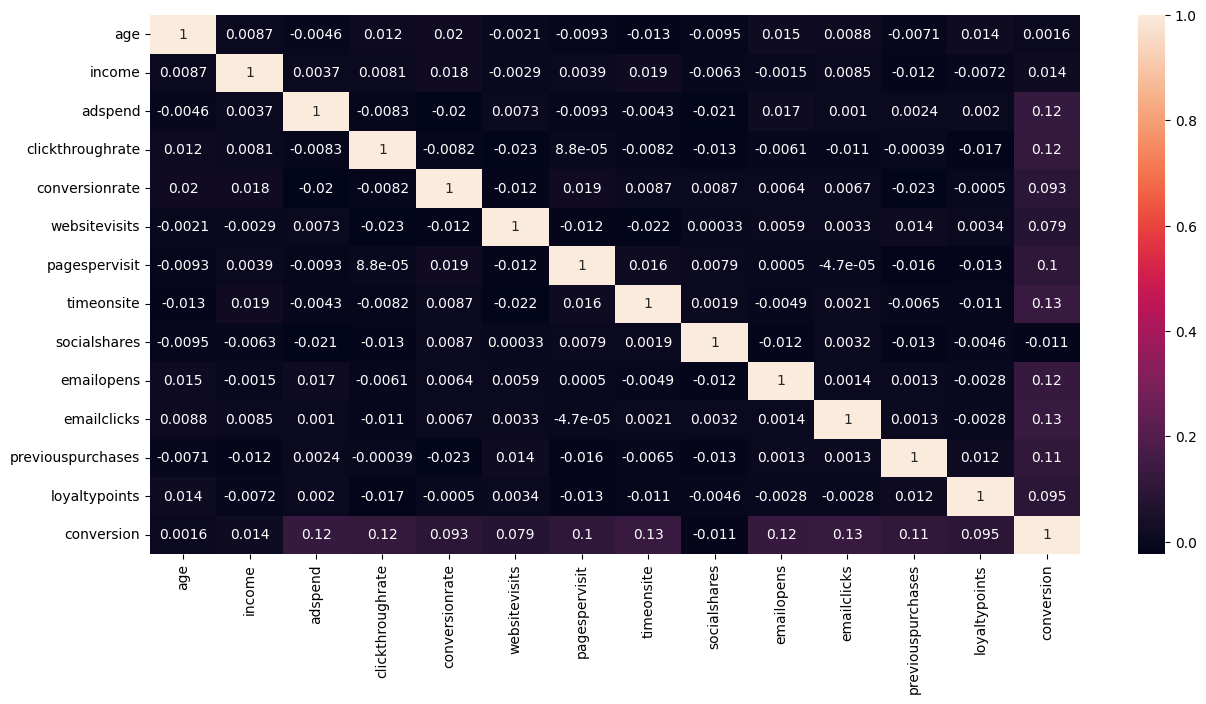

In [25]:
cor_df = df[cor_cols]
cor = cor_df.corr()

plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True)
plt.show()

In [26]:
cor_target = abs(cor['conversion'])
features = cor_target[cor_target > 0.15]
features.index

Index(['conversion'], dtype='object')

In [27]:
df = df[['gender','campaignchannel','campaigntype','adspend', 'clickthroughrate', 'pagespervisit', 'timeonsite',
       'emailopens', 'emailclicks', 'previouspurchases', 'loyaltypoints',
       'conversion']]

In [28]:
df.head()

,gender,campaignchannel,campaigntype,adspend,clickthroughrate,pagespervisit,timeonsite,emailopens,emailclicks,previouspurchases,loyaltypoints,conversion
0,Female,Social Media,Retention,3782.114973,0.247790,3.036386,5.217864,6,1,8,3673,1
1,Female,PPC,Consideration,2542.595351,0.158762,8.689264,11.600881,7,6,0,2508,1
2,Male,Social Media,Retention,777.998178,0.248761,4.104400,2.591178,7,6,6,3940,1
3,Male,Email,Consideration,4582.389432,0.040535,5.301564,12.124416,10,6,6,4616,1
4,Female,Email,Awareness,622.776231,0.014026,1.825657,13.195945,6,1,8,667,0


In [29]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score
from sklearn.feature_selection import RFE

In [30]:
scaler = StandardScaler(with_mean=False)
encoder = OneHotEncoder()
cat_cols = ['gender','campaignchannel','campaigntype']
num_cols = ['adspend', 'clickthroughrate', 'pagespervisit','timeonsite','emailopens', 'emailclicks', 'previouspurchases', 'loyaltypoints']

cat_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])
num_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer([
    ('cat_pipeline',cat_pipeline,cat_cols),
    ('num_pipeline',num_pipeline,num_cols)
])

In [31]:
X = df.drop('conversion',axis=1)
y = df.conversion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [32]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [33]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = precision_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Learning rate set to 0.022141
0:	learn: 0.6742727	total: 211ms	remaining: 3m 30s
1:	learn: 0.6566808	total: 232ms	remaining: 1m 55s
2:	learn: 0.6403682	total: 242ms	remaining: 1m 20s
3:	learn: 0.6245789	total: 251ms	remaining: 1m 2s
4:	learn: 0.6085724	total: 260ms	remaining: 51.7s
5:	learn: 0.5930145	total: 268ms	remaining: 44.4s
6:	learn: 0.5766274	total: 275ms	remaining: 39s
7:	learn: 0.5639905	total: 279ms	remaining: 34.6s
8:	learn: 0.5531578	total: 286ms	remaining: 31.5s
9:	learn: 0.5417778	total: 294ms	remaining: 29.1s
10:	learn: 0.5305483	total: 301ms	remaining: 27s
11:	learn: 0.5193982	total: 309ms	remaining: 25.4s
12:	learn: 0.5085793	total: 316ms	remaining: 24s
13:	learn: 0.5000648	total: 322ms	remaining: 22.7s
14:	learn: 0.4901372	total: 329ms	remaining: 21.6s
15:	learn: 0.4821140	total: 335ms	remaining: 20.6s
16:	learn: 0.4732024	total: 342ms	remaining: 19.8s
17:	learn: 0.4644593	total: 349ms	remaining: 19s
18:	learn: 0.4566797	total: 356ms	remaining: 18.4s
19:	learn: 0.449

In [34]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/cleandf.csv',index=False)